In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from env.env_gym import GuestEnv

In [2]:
def run_env(env, actions, steps=500, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []
    for i in range(steps):
        act = actions[i] if i < len(actions) else actions[-1]
        obs, reward, terminated, truncated, info = env.step(act)
        phonemes.append(info['phoneme'].copy())
        rewards.append(reward)
        if terminated or truncated:
            break
    return np.array(phonemes), np.array(rewards)

def plot_results(phonemes, rewards, title):
    steps = np.arange(len(rewards))
    plt.figure(figsize=(9,4))
    for a in range(phonemes.shape[1]):
        plt.plot(steps, phonemes[:, a], label=f'Agent {a}')
    plt.xlabel('Step'); plt.ylabel('Phonemes'); plt.title(title + ' - Phonemes')
    plt.legend(); plt.grid(True); plt.show()
    plt.figure(figsize=(9,4))
    plt.plot(steps, rewards, label='Reward')
    plt.xlabel('Step'); plt.ylabel('Reward'); plt.title(title + ' - Reward')
    plt.grid(True); plt.show()

In [3]:
# Create environment
env = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
actions = [0]*500
p, r = run_env(env, actions)

2025-10-07 19:40:16 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-10-07T19:40:16.477384+0300 self.energy=array([0.0386978 , 0.27555138, 0.44343917])


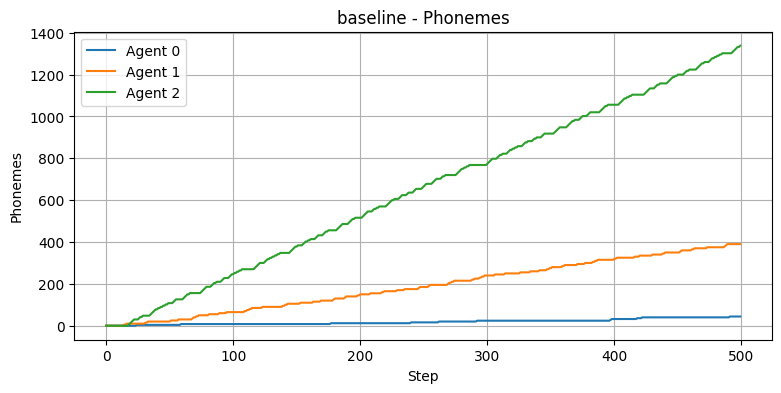

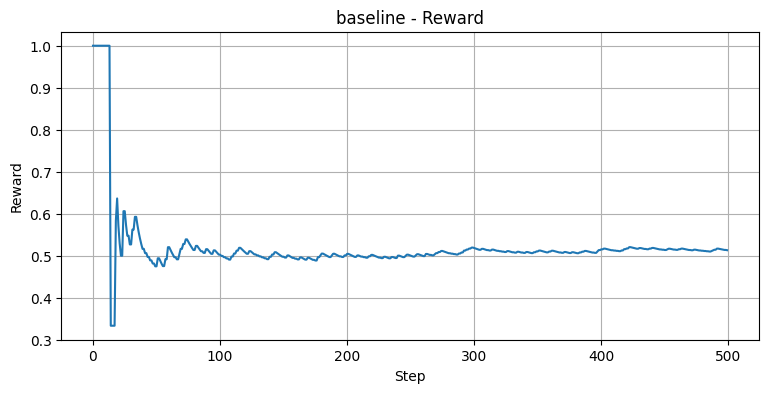

In [4]:
plot_results(p, r, 'baseline')